Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Exploratory Data Analysis**

Load The Dataset

In [2]:
# loading the dataset
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
#checking head (first 5 rows of dataset)
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#shape of datset
mall.shape

(200, 5)

In [5]:
#checking columns of  dataset
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#checking basic info
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#renaming columns
mall.columns = mall.rename(columns={'Annual Income (k$)':'Annual Income', 
                                    'Spending Score (1-100)':'Spending Score'}).columns
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [8]:
#dropping the customerid column
X = mall.drop('CustomerID', axis=1, inplace=True)

In [9]:
#statistical summary
mall.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: >

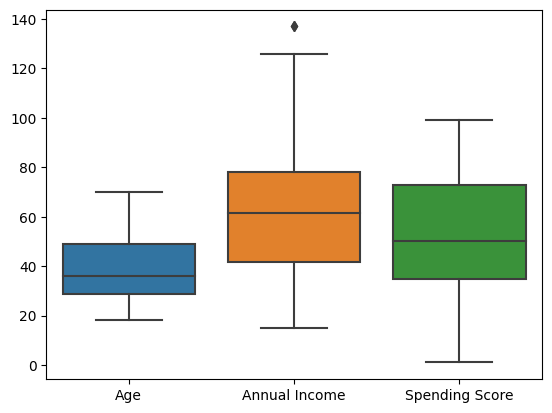

In [10]:
#checking outliers through boxplot
sns.boxplot(data=mall)

Text(0, 0.5, 'Count')

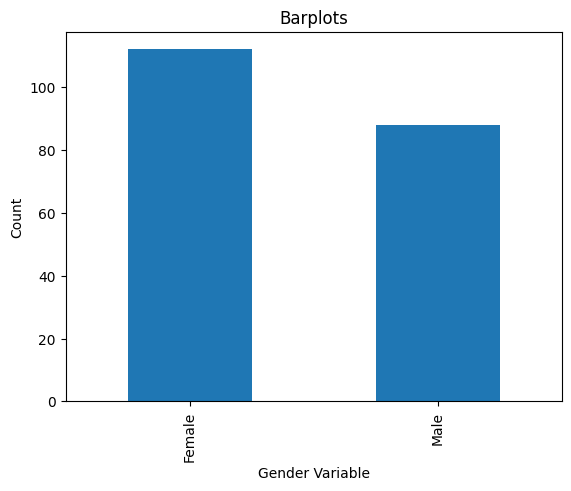

In [11]:
#Plotting Gender for count
mall.Gender.value_counts().plot(kind="bar")
plt.title("Barplots")
plt.xlabel("Gender Variable")
plt.ylabel("Count")

<Axes: xlabel='Annual Income', ylabel='Density'>

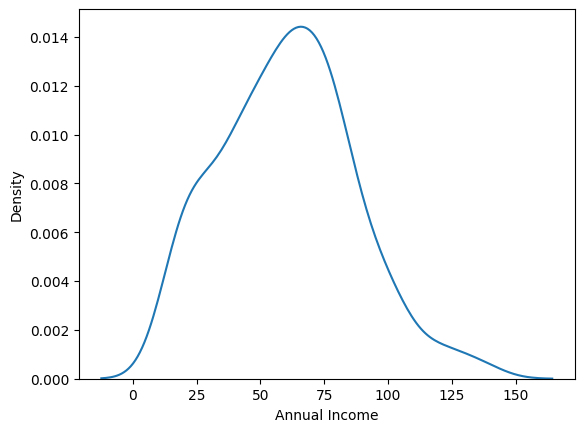

In [12]:
#kde plot 
sns.kdeplot(data=mall, x='Annual Income')

[Text(0.5, 1.0, 'Income vs Score')]

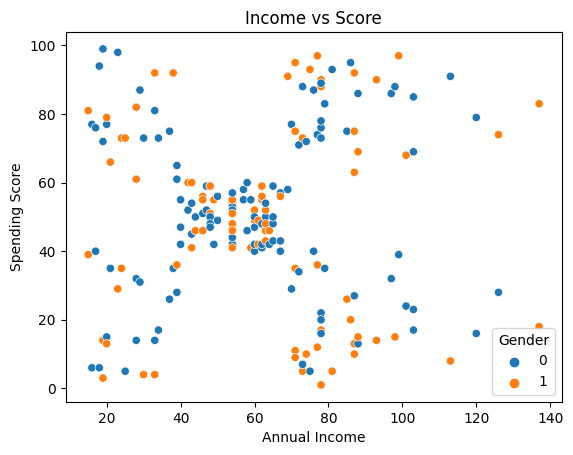

In [21]:
#Scatter plot for the AnnualIncome & SpendingScore
sns.scatterplot(data=mall, x="Annual Income", y="Spending Score", hue="Gender").set(title='Income vs Score')


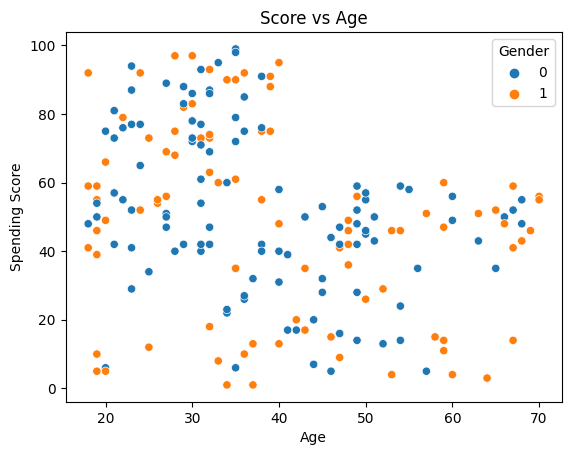

In [22]:
# Scatter plot for the Age & SpendingScore
sns.scatterplot(data=mall,x='Age',y='Spending Score',hue="Gender")
plt.title('Score vs Age')
plt.show()

**Data Processing**

In [23]:
#converting gender to binary
mall.Gender=np.where(mall["Gender"]=="Male",1,0)
mall.Gender

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int32

In [17]:
mall.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
# Scaling desired columns for modelling
scaler=StandardScaler()
scaled_val=scaler.fit_transform(mall[["Annual Income","Spending Score"]])

In [24]:
scaled_val[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [25]:
# Creating a new dataframe with out Gender variable
features=pd.DataFrame(scaled_val,columns=mall.columns[2:4].tolist())
features

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Model Building and Evaluation

DBSCAN

In [27]:
dbscan=DBSCAN(eps=0.5,min_samples=10,metric="euclidean")    
dbscan.fit(features)
y_pred=dbscan.fit_predict(features)

In [28]:
dbscan

DBSCAN(min_samples=10)

In [29]:
y_pred

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [30]:
dbscan.labels_

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

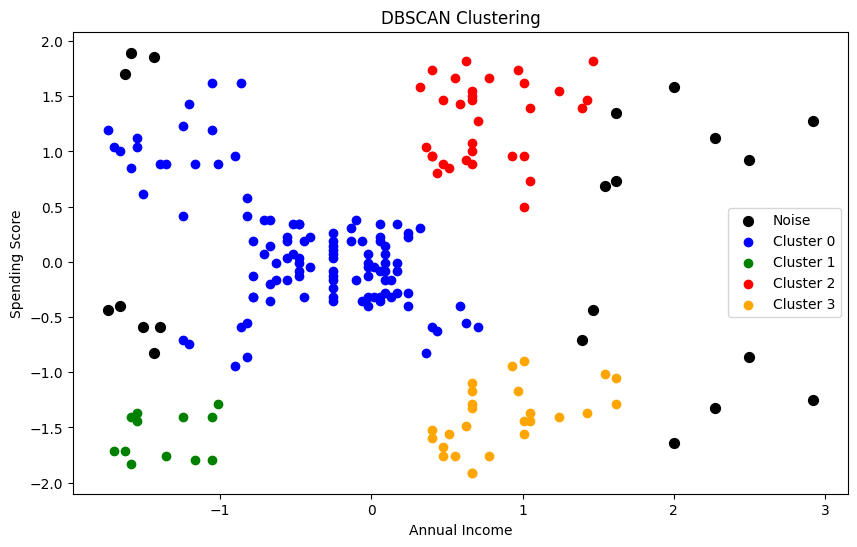

In [32]:
# Plotting for clusters visualization
clr=["blue","green","red","orange","purple"]

plt.figure(figsize=(10,6))
for i in np.unique(y_pred):
    if i==-1:
        plt.scatter(features[y_pred== i]['Annual Income'],features[y_pred== i]['Spending Score'],s=50,c="black",label="Noise")
    else:
        plt.scatter(features[y_pred== i]['Annual Income'],features[y_pred== i]['Spending Score'],label=f"Cluster {i}",c=clr[i])

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [33]:
#Evaluation Metrics
ss=metrics.silhouette_score(features,dbscan.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(ss))

Silhouette_Score Coefficient : 0.41


**Conclusion:**

Cluster 0 (Blue) and cluster 2 (Red) customers, with balanced spending behavior and higher annual incomes, are the most profitable and should be targeted for business growth, while cluster 1 (Green) customers with low incomes are not profitable, and cluster 3 (Orange) customers with higher incomes but cautious spending should be monitored for potential opportunities.

Cluster black (Noise) treated as outliers